# **Análisis de mensajes sarcásticos**
#Hito 3

###Nicolás García - Javier Lavados - José Triviño - Pablo Gutiérrez - Sebastián Salinas


# **Introducción**

El sarcasmo es una forma de comunicación mediante la cual las personas expresan información que debe ser interpretada con el sentido contrario a su significado literal, usualmente con un fin humorístico o de burla. El sarcasmo es principalmente distinguido a través del tono de voz empleado, y depende en gran parte del contexto en el cual se utiliza. La identificación del sarcasmo en datos de texto es uno de los grandes desafíos en el procesamiento de lenguajes naturales (PLN), el cual se ocupa de la formulación e investigación de mecanismos eficaces computacionalmente para la comunicación entre personas y máquinas por medio del lenguaje natural, en contraposición a los lenguajes de programación.


Reddit es una red social en la cual los usuarios pueden participar subiendo texto, imágenes, videos o enlaces a distintas comunidades organizadas por tema, también conocidas como “subreddits”, que cubren una gran variedad de tópicos como noticias, política, ciencia, películas, videojuegos específicos, etc. Cada post cuenta con su propia sección de comentarios, donde los usuarios pueden opinar sobre el post en cuestión.


Una convención frecuentemente utilizada en esta red social consiste en escribir “/s” al final de un comentario si este debe ser interpretado de forma sarcástica, lo cual sirve para remover cualquier ambigüedad acerca de la naturaleza de este, efectivamente implicando que el usuario desea transmitir el sentimiento opuesto a lo comentado.


El propósito inicial de este estudio consistió en analizar el contenido de un [dataset de comentarios sarcásticos de Reddit](https://www.kaggle.com/danofer/sarcasm), utilizando una base de datos con 1.3 millones de comentarios marcados con la etiqueta “/s”, cada uno con el comentario padre correspondiente, contando además con el subreddit del cual fueron extraídos, otorgando así un mayor contexto acerca del tema que está siendo abordado en la conversación. Posteriormente se incorporaron nuevos datos provenientes del mismo sitio correspondientes a comentarios no sarcásticos, los cuales permitieron tener una mayor cantidad de ejemplos que permitieran el entrenamiento de un clasificador.

# **Motivación**

El procesamiento de lenguajes naturales (abreviado PLN) es un campo de las ciencias de la computación, de la inteligencia artificial y de la lingüística que estudia las interacciones entre las computadoras y el lenguaje humano. Se ocupa de la formulación e investigación de mecanismos eficaces computacionalmente para la comunicación entre personas y máquinas por medio del lenguaje natural. Una de las principales dificultades en esta disciplina es la inherente ambigüedad presente en las lenguas naturales, tanto a nivel léxico (una palabra puede tener varios significados distintos) o estructural (construcción de árboles sintácticos). En el nivel pragmático, una oración puede no necesariamente significar lo que realmente se está diciendo, y elementos como el sarcasmo pueden alterar completamente el significado de una oración.

El sarcasmo como elemento es transmitido principalmente a través del tono de voz empleado, por lo que expresarlo mediante texto puede resultar complicado para los humanos, y aún más complicado puede ser interpretarlo para una máquina. El propósito de este análisis es realizar un estudio donde se puedan encontrar patrones que permitan caracterizar un comentario sarcástico de otros que no lo son, obteniendo información importante para deducir como una máquina podría en un futuro detectar sarcasmo.

# **Exploración de datos**

## **Dataset inicial**

La exploración de datos inicial se llevó a cabo sobre una base de datos con comentarios sarcásticos obtenida desde Kaggle, la cual fue mencionada en la introducción. Lo primero que se realizó fue una revisión inicial del dataset para comprender cómo están estructurados los datos. Esto significa, entender cuantos datos son, cuantas columnas, qué describe cada columna, el tipo de datos de las columnas, entre otras cosas.

In [ ]:
# Activate R magic:
%load_ext rpy2.ipython

In [ ]:
# Importación del dataset descargado localmente:
%%R
library(tidyverse)
sarcasmo <- read_csv("train-balanced-sarcasm.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  label = col_double(),
  comment = col_character(),
  author = col_character(),
  subreddit = col_character(),
  score = col_double(),
  ups = col_double(),
  downs = col_double(),
  date = col_character(),
  created_utc = col_datetime(format = ""),
  parent_comment = col_character()
)

|==================================================================| 100% 243 MB


### **Atributos del dataset**

Con la función ```head``` se analizaron los primeros datos del dataset y los encabezados de cada atributo. Esto sirvió para llevar a cabo un análisis inicial y verificar que los datos fueron cargados de forma exitosa.

In [ ]:
%%R
head(sarcasmo)

# A tibble: 6 x 10
  label comment     author subreddit score   ups downs date  created_utc        
  <dbl> <chr>       <chr>  <chr>     <dbl> <dbl> <dbl> <chr> <dttm>             
1     0 "NC and NH… Trump… politics      2    -1    -1 2016… 2016-10-16 23:55:23
2     0 "You do kn… Shbsh… nba          -4    -1    -1 2016… 2016-11-01 00:24:10
3     0 "They were… Creep… nfl           3     3     0 2016… 2016-09-22 21:45:37
4     0 "This meme… icebr… BlackPeo…    -8    -1    -1 2016… 2016-10-18 21:03:47
5     0 "I could u… cush2… MaddenUl…     6    -1    -1 2016… 2016-12-30 17:00:13
6     0 "I don't p… only7… AskReddit     0     0     0 2016… 2016-09-02 10:35:08
# … with 1 more variable: parent_comment <chr>


### **Eliminación de valores nulos**

Para revisar la presencia de valores inexistentes en el dataset se utilizó la función is.na(), la cual retorna un valor de verdad dependiendo si el dato es nulo o no. Se realizó la operación suma sobre estos valores booleanos, donde un total de 0 indica que no se encontraron valores TRUE en el dataset, indicando que no hay datos inexistentes en las columnas.

In [ ]:
%%R
# Suma de valores NA en todas las columnas del dataset:
sum(is.na(sarcasmo$comment))
sum(is.na(sarcasmo$author))
sum(is.na(sarcasmo$subreddit))
sum(is.na(sarcasmo$score))
sum(is.na(sarcasmo$ups))
sum(is.na(sarcasmo$downs))
sum(is.na(sarcasmo$date))
sum(is.na(sarcasmo$created_utc))
sum(is.na(sarcasmo$parent_comment))

# Mostrar existencia de filas con valores NA 
# (notar que no son las que tienen como mentario el string '0', si no las que tienen datos NA):
sarcasmo[sarcasmo$comment == 0,]

# A tibble: 59 x 10
   label comment author    subreddit score   ups downs date  created_utc        
   <dbl> <chr>   <chr>     <chr>     <dbl> <dbl> <dbl> <chr> <dttm>             
 1     0 0       Anxietyf… pokemongo     6    -1    -1 2016… 2016-12-26 00:27:13
 2    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 3    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 4    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 5    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 6    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 7    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
 8     0 0       sleeplyb… pcmaster…     1     1     0 2016… 2016-05-22 01:30:49
 9    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
10    NA <NA>    <NA>      <NA>         NA    NA    NA <NA>  NA                 
# … with

Como se puede observar se encontraron valores vacíos. Por lo tanto, con el objetivo de limpiar el dataset se eliminaron las filas con valores nulos.

In [ ]:
%%R
sarcasmo=sarcasmo[is.na(sarcasmo$author)==FALSE,]
head(sarcasmo)

# A tibble: 6 x 10
  label comment     author subreddit score   ups downs date  created_utc        
  <dbl> <chr>       <chr>  <chr>     <dbl> <dbl> <dbl> <chr> <dttm>             
1     0 "NC and NH… Trump… politics      2    -1    -1 2016… 2016-10-16 23:55:23
2     0 "You do kn… Shbsh… nba          -4    -1    -1 2016… 2016-11-01 00:24:10
3     0 "They were… Creep… nfl           3     3     0 2016… 2016-09-22 21:45:37
4     0 "This meme… icebr… BlackPeo…    -8    -1    -1 2016… 2016-10-18 21:03:47
5     0 "I could u… cush2… MaddenUl…     6    -1    -1 2016… 2016-12-30 17:00:13
6     0 "I don't p… only7… AskReddit     0     0     0 2016… 2016-09-02 10:35:08
# … with 1 more variable: parent_comment <chr>


### **Dimensiones y métricas del dataset**

In [ ]:
%%R
dim(sarcasmo)

[1] 1010826      10


La función ```summary``` aplica estadísticas a cada columna. En particular, indica el promedio, mediana, cuantiles, máximo, mínimo, entre otros. 

In [ ]:
%%R
summary(sarcasmo)

     label       comment             author           subreddit        
 Min.   :0.0   Length:1010826     Length:1010826     Length:1010826    
 1st Qu.:0.0   Class :character   Class :character   Class :character  
 Median :0.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.5                                                           
 3rd Qu.:1.0                                                           
 Max.   :1.0                                                           
     score               ups               downs             date          
 Min.   :-507.000   Min.   :-507.000   Min.   :-1.0000   Length:1010826    
 1st Qu.:   1.000   1st Qu.:   0.000   1st Qu.: 0.0000   Class :character  
 Median :   2.000   Median :   1.000   Median : 0.0000   Mode  :character  
 Mean   :   6.886   Mean   :   5.499   Mean   :-0.1459                     
 3rd Qu.:   4.000   3rd Qu.:   3.000   3rd Qu.: 0.0000                     
 Max.   :9070.000   Max.   :5163.000   M

### **Exploración de datos sobre los comentarios sarcásticos**
Una de las componentes más importantes de esta exploración de datos fue averiguar cuales eran las palabras más recurrentes en los comentarios sarcásticos y en los comentarios padre, los cuales no contienen la etiqueta “/s”.

Dicho esto, la forma más tradicional de representar texto es considerar cada palabra de cada comentario como una columna del dataset, ya que como se mencionó previamente, la idea principal es considerar si aparece o no una palabra en cierto comentario o cuántas veces aparece en él.

Para esto se utilizó la librería ``tm``, la cual permite realizar _text mining_ en R:

In [ ]:
%%R
install.packages("tm")

In [ ]:
%%R
library(tm)

Se convierten los vectores de comentarios sarcasticos en unos que puedan ser leídos por ``tm``, donde habrán tantos documentos como comentarios. Luego, se crea un Corpus o colección de documentos.

In [ ]:
%%R
docs <- VectorSource(sarcasmo[,c("comment")])
docs <- VCorpus(docs)

Al ejecutar la siguiente instrucción, se puede ver de forma resumida la composición del Corpus o colección de documentos

In [ ]:
%%R
inspect(docs)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

$comment
<<PlainTextDocument>>
Metadata:  7
Content:  chars: NA



#### **Pre-procesamiento de texto**
En un comienzo, el contenido de cada documento de la colección contendrá mucha información que de momento no es relevante, ya que si bien existen bastantes elementos claves al momento de transmitir el sarcasmo, como los tipos de puntuación, la diferenciación entre mayúsculas y minúsculas, entre otros, para esta primera exploración solo se consideró la frecuencia de las palabras por sobre otras características. Por ello, fue necesario efectuar un pre-procesamiento y limpieza de los datos.

In [ ]:
# Remover puntuación:
%%R
docs <- tm_map(docs, removePunctuation)

In [ ]:
# Remover números:
%%R
docs <- tm_map(docs, removeNumbers)

In [ ]:
# Convertir a minúscula:
%%R
docs <- tm_map(docs, content_transformer(tolower))

In [ ]:
# Eliminar espacios en blanco innecesarios:
%%R
docs <- tm_map(docs, stripWhitespace)

In [ ]:
# Reemplazar caracteres específicos:
%%R
docs <- tm_map(docs, content_transformer(gsub), pattern = "/", replacement = "")
docs <- tm_map(docs, content_transformer(gsub), pattern = '[[:digit:]]+', replacement = "")  # elimina cualquier digito

In [ ]:
# Eliminar tildes (A pesar que los comentarios están en inglés, nunca está de más prevenir):
%%R
docs <- tm_map(docs, content_transformer(iconv), from="UTF-8",to="ASCII//TRANSLIT")

In [ ]:
# Remover caracteres especiales no considerados por "removePunctuation":
%%R
removeSpecialChars <- function(x) gsub("[^a-zA-Z0-9 ]","",x)
docs <- tm_map(docs, content_transformer(removeSpecialChars))

#### **Matriz Documento-término**

Una forma tradicional de representar los datos es mediante una matriz. La idea principal es considerar cada documento como una fila, la cual a su vez tiene tantas columnas como términos existan en el corpus completo de documento (no por documento). De esta forma, se puede saber cuáles términos se repiten entre documentos.

Para esto, se utilizará la función ``DocumentTermMatrix``, la cual empleará nuestra colección completa de documentos:

In [ ]:
%%R
dtm <- DocumentTermMatrix(docs)
inspect(dtm)

<<DocumentTermMatrix (documents: 1, terms: 192640)>>
Non-/sparse entries: 192640/0
Sparsity           : 0%
Maximal term length: 10000
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs    and   are   but   for  have   its   that    the  this    you
   1 173674 67737 78880 96672 67143 65855 140695 396234 77714 171491


In [ ]:
# Transformar la DocumentTermMatrix en una matriz "visualizable":
%%R
dtm.matrix <- as.matrix(dtm) 

#### **Términos más frecuentes presentes en los comentarios sacásticos**

A continuación se hará una exploración de las palabras más frecuentes en el dataset, considerando los comentarios principales y sus comentarios padre. Para esto, se creó un dataframe con 2 columnas, una para el término y otra para la cantidad de veces que aparece en la colección completa:

##### **Palabras más frecuentes de los comentarios sarcásticos**

In [ ]:
%%R
freq <- colSums(dtm.matrix)
word_freq <- data.frame(word = names(freq), freq = freq, row.names = NULL)
word_freq <- word_freq[order(-word_freq$freq),]

In [ ]:
# Importación de la librería ggplot2 para graficar en R:
%%R
library(ggplot2)

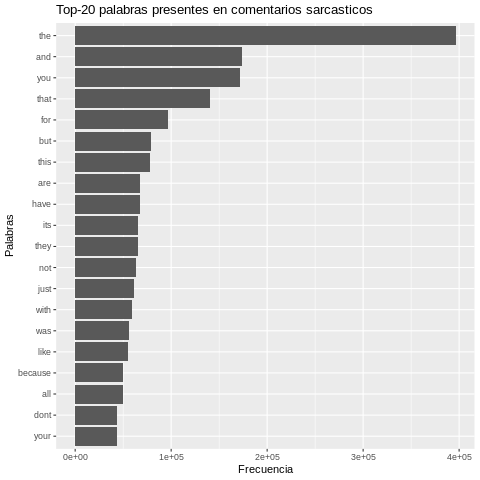

In [ ]:
# Graficar términos más frecuentes presentes en los comentarios sarcásticos:
%%R
ggplot(word_freq[1:20,], aes(x = reorder(word, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 palabras presentes en comentarios sarcasticos") + xlab("Palabras") + ylab("Frecuencia")


Como es posible apreciar, la mayoría de estas palabras son aquellas que no entregan mayor significado a los documentos. Por ejemplo, artículos o preposiciones. Para solucionar este problema, podemos considerar una bolsa de palabras comunes llamada ``stopwords``. Por lo tanto, se eliminarán estas palabras sobre el corpus original de documentos para luego calcular la matriz nuevamente.

In [ ]:
# Remover stopwords:
%%R
docs <- tm_map(docs, removeWords, stopwords("english"))

In [ ]:
%%R
dtm.sw <- DocumentTermMatrix(docs)
dtm.sw.matrix <- as.matrix(dtm.sw)
freq.sw <- colSums(dtm.sw.matrix)
word_freq.sw <- data.frame(word = names(freq.sw), freq = freq.sw, row.names = NULL)
word_freq.sw <- word_freq.sw[order(-word_freq.sw$freq),]

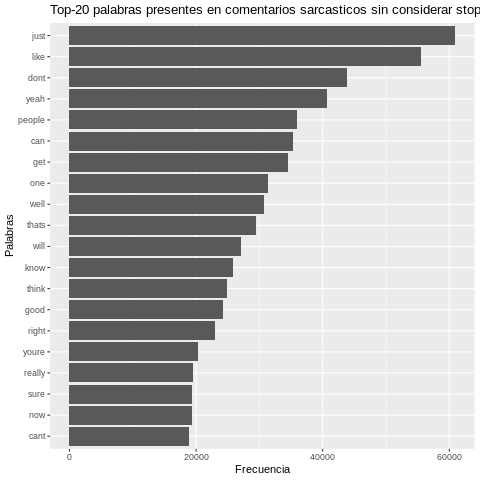

In [ ]:
# Volver a graficar términos más frecuentes presentes en los comentarios sarcásticos, esta vez sin considerar stopwords:
%%R
ggplot(word_freq.sw[1:20,], aes(x = reorder(word, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 palabras presentes en comentarios sarcasticos sin considerar stopwords")  + xlab("Palabras") + ylab("Frecuencia")


##### **Palabras más frecuentes de los comentarios padre**

In [ ]:
%%R
docs <- VectorSource(sarcasmo[,c("parent_comment")])
docs <- VCorpus(docs)
inspect(docs)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

$parent_comment
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 134796790



In [ ]:
# Pre-procesamiento de texto:

# Remover puntuación:
%%R
docs <- tm_map(docs, removePunctuation)


In [ ]:
# Remover números:
%%R
docs <- tm_map(docs, removeNumbers)


In [ ]:
# Convertir a minúscula:
%%R
docs <- tm_map(docs, content_transformer(tolower))


In [ ]:
# Eliminar espacios en blanco innecesarios:
%%R
docs <- tm_map(docs, stripWhitespace)


In [ ]:
# Reemplazar caracteres específicos:
%%R
docs <- tm_map(docs, content_transformer(gsub), pattern = "/", replacement = "")
docs <- tm_map(docs, content_transformer(gsub), pattern = '[[:digit:]]+', replacement = "")  # elimina cualquier digito


In [ ]:
# Eliminar tildes:
%%R
docs <- tm_map(docs, content_transformer(iconv), from="UTF-8",to="ASCII//TRANSLIT")


In [ ]:
# Remover caracteres especiales no considerados por "removePunctuation":
%%R
removeSpecialChars <- function(x) gsub("[^a-zA-Z0-9 ]","",x)
docs <- tm_map(docs, content_transformer(removeSpecialChars))


In [ ]:
# Matriz Documento-término:
%%R
dtm <- DocumentTermMatrix(docs)
inspect(dtm)


<<DocumentTermMatrix (documents: 1, terms: 287500)>>
Non-/sparse entries: 287500/0
Sparsity           : 0%
Maximal term length: 40000
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs    and    are    but    for   have   that    the   this   with    you
   1 498319 149340 146083 238426 156306 304238 945194 189168 158169 297746


In [ ]:
# Transformar la DocumentTermMatrix en una matriz "visualizable":
%%R
dtm.matrix <- as.matrix(dtm) 

In [ ]:
# Términos más frecuentes presentes en los comentarios padre:
%%R
freq <- colSums(dtm.matrix)
word_freq <- data.frame(word = names(freq), freq = freq, row.names = NULL)
word_freq <- word_freq[order(-word_freq$freq),]

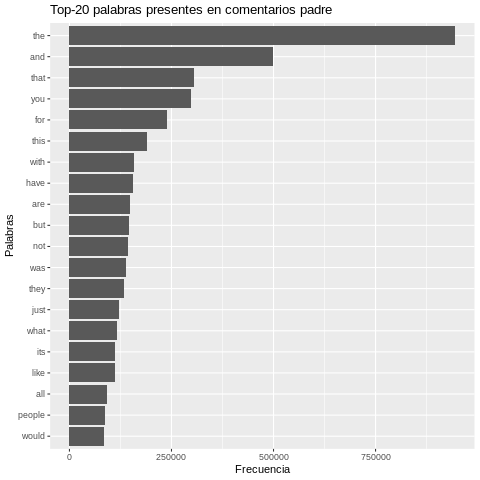

In [ ]:
# Graficamos términos más frecuentes presentes en los comentarios padre:
%%R
ggplot(word_freq[1:20,], aes(x = reorder(word, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 palabras presentes en comentarios padre") + xlab("Palabras") + ylab("Frecuencia")

In [ ]:
# Remover stopwords:
%%R
docs <- tm_map(docs, removeWords, stopwords("english"))

In [ ]:
%%R
dtm.sw <- DocumentTermMatrix(docs)
dtm.sw.matrix <- as.matrix(dtm.sw)
freq.sw <- colSums(dtm.sw.matrix)
word_freq.sw <- data.frame(word = names(freq.sw), freq = freq.sw, row.names = NULL)
word_freq.sw <- word_freq.sw[order(-word_freq.sw$freq),]

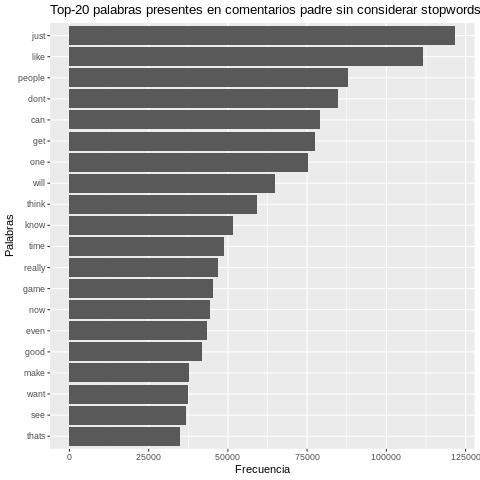

In [ ]:
# Volver a graficar términos más frecuentes presentes en los comentarios padre, esta vez sin considerar stopwords:
%%R
ggplot(word_freq.sw[1:20,], aes(x = reorder(word, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 palabras presentes en comentarios padre sin considerar stopwords") + xlab("Palabras") + ylab("Frecuencia")


Haciendo una comparación entre los graficos sin stopwords para ambos tipos de comentarios, se puede notar que las palabras más utilizadas resultan ser bastante similares (a excepción de un par, como la expresión "yeah", que toma más relevancia en comentarios sarcasticos), y que por el lado de las frecuencias, si bien se aprecian leves cambios en el orden, en general son similares en frecuencia para ambos tipos de comentario.

Esto nos da distintas posibilidades respecto a los comentarios sarcásticos, ya que podría indicarnos que la mayoría de comentarios sarcásticos suelen mencionar las mismas palabras que contiene el comentario padre (Ya sea por énfasis, burla, etc.) o también indicar que algunos comentarios sarcásticos son respuestas de otros comentarios sarcásticos, lo cuál podría dificultar el estudio de este tipo de comentarios.

A partir de esto se puede intentar buscar una correlación entre palabras en un comentario y la clase de este (si es sarcástico o no). O incluso investigar si es que existe una doble correlación, es decir, que un comentario sarcástico implique la presencia de ciertas palabras, y que se tenga lo inverso, que la presencia de ciertas palabras resulte indicativa de un comentario sarcástico. Se podría buscar la presencia de estas palabras en ambos tipos de comentarios y después entrenar un clasificador para ver si en verdad puede predecir la naturaleza del comentario.

Otra conclusión que se puede hacer es sobre el uso de la puntuación y las mayúsculas. Pese a que se eliminaron puntuaciones, letras mayúsculas, y otros strings que entorpezcan el estudio de datos, notamos que gran parte de los comentarios del dataset utilizan muy frecuentemente estos strings con el fin de "exagerar" o "enfatizar" el sarcasmo de los comentarios estudiados. Es necesario realizar un estudio más exhaustivo de estos tipos de mensajes, y ver si existe una relación entre cantidad de mayúsculas y otras puntuaciones dentro de un mensaje con sarcasmo.

### **Exploración posterior**

Para el Hito 1 se realizó un análisis de los comentarios sarcásticos a través del tiempo. Sin embargo, se recibió feedback por parte del cuerpo docente, y se concluyó que esta pregunta era trivial y no podía ser respondida utilizando técnicas de minería de datos, por lo que para los hitos posteriores se decidió descartar esta parte de la exploración. 

Durante los hitos anteriores también se exploraron los subreddits que presentaban mayor frecuencia dentro del dataset. Estos datos fueron utilizados para deteminar los subreddits que serían utilizados para entrenar clasificadores durante los hitos siguientes.


#### **Subreddits más recurrentes en los comentarios sarcásticos**
Observando la columna “subreddit” es posible ver que ciertos tópicos se repiten. Es por esto que se decidió realizar una exploración de datos para cuantificar cuales subreddits son los más repetidos en el dataset. Es decir, contar la cantidad de comentarios sarcásticos que tiene cada subreddit presente en el dataset, lo que es equivalente a encontrar los subreddits que son más propensos a tener comentarios sarcasticos.


In [ ]:
%%R
docs <- VectorSource(sarcasmo[,c("subreddit")])
docs <- VCorpus(docs)
inspect(docs)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1

$subreddit
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 9320529



In [ ]:
# Matriz Documento-término:
%%R
dtm <- DocumentTermMatrix(docs)
inspect(dtm)

<<DocumentTermMatrix (documents: 1, terms: 14876)>>
Non-/sparse entries: 14876/0
Sparsity           : 0%
Maximal term length: 21
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs askreddit funny leagueoflegends  news   nfl pcmasterrace  pics politics
   1     65677 17939           21037 16891 14150        18988 16154    39496
    Terms
Docs todayilearned worldnews
   1         14161     26377


In [ ]:
# Transformar la DocumentTermMatrix en una matriz "visualizable":
%%R
dtm.matrix <- as.matrix(dtm) 

In [ ]:
# Subreddits más presentes en el dataset:
%%R
freq <- colSums(dtm.matrix)
subreddit_freq <- data.frame(subreddit = names(freq), freq = freq, row.names = NULL)
subreddit_freq <- subreddit_freq[order(-subreddit_freq$freq),]
head(subreddit_freq)

            subreddit  freq
905         askreddit 65677
10087        politics 39496
14568       worldnews 26377
7267  leagueoflegends 21037
9638     pcmasterrace 18988
5061            funny 17939


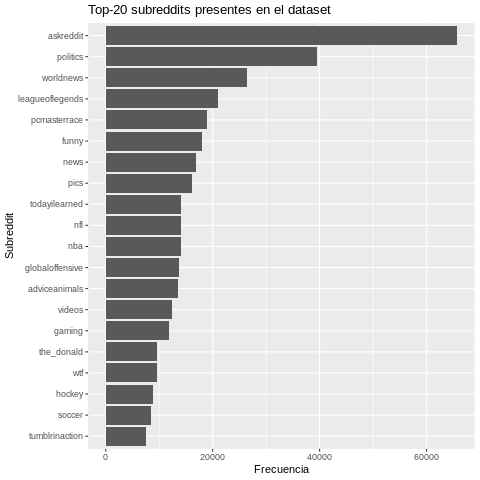

In [ ]:
# Graficar subreddits más frecuentes en los comentarios sarcasticos del dataset:
%%R
ggplot(subreddit_freq[1:20,], aes(x = reorder(subreddit, freq), y = freq)) +
          geom_bar(stat = "identity") + 
          coord_flip()+
          ggtitle(label = "Top-20 subreddits presentes en el dataset")  + xlab("Subreddit") + ylab("Frecuencia")

A partir de este análisis se puede concluir que los subreddits con mayor presencia en el dataset son bastante variados, abarcando tanto temas serios como política o noticias como temas lúdicos como el videojuego "League of Legends" o deportes.

#### **Cantidad de caracteres por comentario sarcástico**

Otra exploración que se puede realizar y que puede servir para encontrar una relación entre si un comentario es sarcastico o no, es identificar la cantidad de caracteres que posee, o dicho de otra forma, encontrar el largo del comentario, además de también conocer estadísticas sobre el largo en palabras de los comentarios, tales como el promedio, el máximo y mínimo.


# A tibble: 56 x 10
   label comment    author subreddit score   ups downs date  created_utc        
   <dbl> <chr>      <chr>  <chr>     <dbl> <dbl> <dbl> <chr> <dttm>             
 1     0 DONALD TR… Sage2… circleje…     2    -1    -1 2016… 2016-10-04 04:42:48
 2    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 3    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 4    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 5    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 6    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 7    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 8    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
 9    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
10    NA <NA>       <NA>   <NA>         NA    NA    NA <NA>  NA                 
# … with

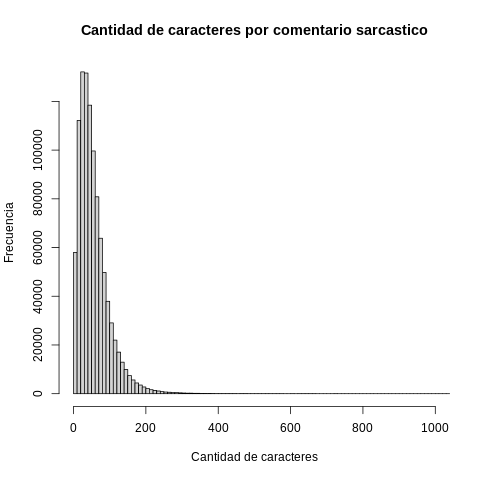

In [ ]:
%%R
length_comment = str_length(sarcasmo$comment)
hist(length_comment,xlim=c(0,1000), breaks = 1000, main = "Cantidad de caracteres por comentario sarcastico", 
     xlab = "Cantidad de caracteres", ylab = "Frecuencia" )

# Resumen de estadísticas del largo de los comentarios sarcásticos:
summary(length_comment)

sarcasmo[str_length(sarcasmo$comment) == 10000,]


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    42.0    75.0   133.3   144.0 40301.0 


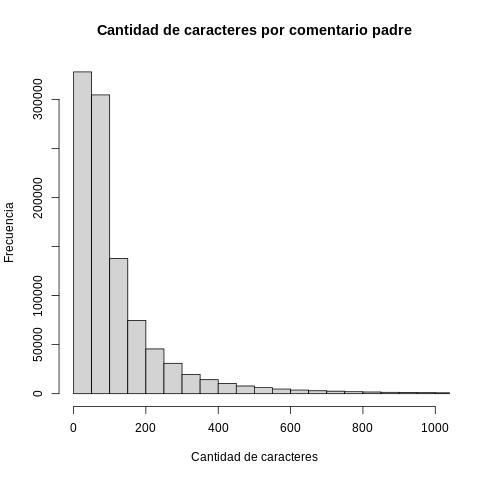

In [ ]:
# Cantidad de caracteres por comentario padre:
%%R
length_parent = str_length(sarcasmo$parent_comment)
hist(length_parent,xlim=c(0,1000), breaks = 1000, main = "Cantidad de caracteres por comentario padre",
     xlab = "Cantidad de caracteres", ylab = "Frecuencia" )

# Resumen de estadísticas del largo de los comentarios padre:
summary(length_parent)

Analizando las estadísticas sobre el largo de ambos tipos de comentarios se puede notar la presencia de outliers, ya que en el caso de los comentarios sarcasticos se tiene un promedio de 56,69 caracteres y una mediana de 46 caracteres, pero un máximo de 10000.

Esto nos dice que existe al menos un comentario sarcastico que contiene 10000 caracteres. Realizando la consulta adecuada se pudo observar que son tres los comentarios que alcanzan los 10000 caracteres, y uno de ellos es una secuencia que repite el nombre Donald Trump una gran cantidad de veces, llegando a generar un comentario de 10000 caracteres.

Este comentario se aleja excesivamente de las medidas de tendencia central y por ende es un outlier que afecta a estadisticas que no son robustas, como el promedio. Algo similar pasa en el caso de los comentarios padres, donde se tiene un promedio de 133.4 caractes y una mediana de 75 caracteres, pero un máximo de 40301.

Es por esto que con el objetivo de facilitar la visualización de los datos se realizó un zoom a los dos graficos generados, ya que debido a la presencia de outliers las escalas de los graficos quedaban muy extensas.

Haciendo una compración entre los dos gráficos es posible observar que los comentarios sarcasticos se encuentran en un rango entre 0 a 400 caracteres, con una mediana de 46 caracteres. Y que los comentarios padres se encuentran en un rango entre 0 y un poco más de 1000 caracteres, con una mediana de 75 caracteres. Lo que nos dice que en general los comentarios padre son más largos que los comentarios sarcasticos. Sin embargo para ambos tipos de comentario, la mayor concentración de datos está entre los 0 a 200 caracteres.

## **Dataset comentarios no sarcásticos**

Para el Hito 2 se decidió incorporar una nueva base de datos con [comentarios de *Reddit* de todo tipo](https://www.kaggle.com/smagnan/1-million-reddit-comments-from-40-subreddits), con la finalidad de incluir comentarios no sarcásticos y de esta forma tener una mayor cantidad de comentarios que puedan ser contrastados con aquellos que contienen el substring "/s". Dado que la cantidad total de comentarios es demasiado grande para poder estudiarlos a profundidad, se decidió tomar de ambos datasets (Hito 1 e Hito 2) los comentarios provenientes de los 5 subreddits con mayor cantidad de comentarios, y juntarlos en un único dataset que los reúna.

De ahora en adelante se mencionará cada uno de estos 5 subreddits con su notación utilizada dentro de Reddit, la cual es la siguiente: **"r/X"**. Donde "r/" indica que estamos hablando de un subreddit especifico y "X" indica cual es el nombre de dicho subreddit. A manera de ejemplo al mencionar el subreddit **"AskReddit"** diremos **"r/AskReddit"**.

Para poder construir nuestro nuevo dataset, se preprocesaron los datos como se indica a continuación:
1. Se filtró del primer dataset (Hito 1) los subreddits con más comentarios sarcásticos utilizando filtros de Excel, lo cuál redujo considerablemente la cantidad de comentarios a estudiar.
2. Se filtró del segundo dataset (Hito 2) los subreddits con más comentarios de todo tipo utilizando filtros de Excel.
3. Se escogieron los 5 subreddits comunes con más comentarios de ambos datasets, los cuales son *r/AskReddit*, *r/funny*, *r/politics*, *r/leagueoflegends* y *r/worldnews*.
4. Se eliminaron los comentarios sarcásticos del nuevo dataset (Hito 2), dado que buscamos solamente comentarios no sarcásticos para evitar duplicaciones en los datos. Para esto, utilizando filtros de Excel, se eliminaron todos los comentarios que contenían el string "/s". Este proceso no necesariamente puede eliminar todos los comentarios sarcásticos presentes en el dataset, ya que pueden existir comentarios sarcásticos que no contengan el string "/s". Sin embargo, se decidió considerar estos casos como ruido dentro del dataset, asumiendo que los comentarios de este tipo son una minoría con respecto al número total de comentarios.
5. Se eliminaron atributos que no coinciden con el nuevo dataset o que no brindan mucha información, tales como *Author*, *ups*, *downs*, *date*, *created_utc* y *parent_comment*.
6. Se juntaron y etiquetaron todos los comentarios de ambas tablas en Excel, agregando un nuevo atributo bajo el nombre de *“sarcasm”*, cuyo valor puede ser *“yes”* (si provienen del primer dataset) o *“no”* (si provienen del nuevo dataset), denotando si el comentario es sarcástico o no.

### **Exploración de Datos: Comentarios no sarcásticos**

Dado que el fin de este proyecto es el análisis y estudio de comentarios sarcásticos, no se realizará una exploración exhaustiva del nuevo dataset debido a que ya obtuvimos la información relevante con respecto a los comentarios sarcásticos en la primera exploración. A continuación se muestra la información básica de nuestro dataset final, incluyendo la proporcion de comentarios sarcásticos y no sarcásticos:

In [ ]:
# Librerias principales para la exploración:
import csv
import pandas as pd
import numpy as np

# Clasificadores usados en la exploración:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC  # Support Vector Machine para strings
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

El paso inicial para comenzar el análisis de los nuevos datos fue cargar los datos correspondientes desde un documento en Excel con el comentario, el subreddit y un indicador que nos informa si el comentario es sarcástico o no.

In [ ]:
yes_or_no = pd.read_excel("DatosHito2.xlsx")
yes_or_no.head()

,comment,subreddit,score,sarcasm
0,"I don't pay attention to her, but as long as s...",AskReddit,0,yes
1,Trick or treating in general is just weird...,AskReddit,1,yes
2,what the fuck,AskReddit,22,yes
3,This would make me cry.,AskReddit,1,yes
4,My stuffed animal I've had since I was born.,AskReddit,1,yes


Se obtiene la información relevante a partir de esta tabla.

In [ ]:
yes_or_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295218 entries, 0 to 295217
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   comment    295218 non-null  object
 1   subreddit  295218 non-null  object
 2   score      295218 non-null  int64 
 3   sarcasm    295218 non-null  object
dtypes: int64(1), object(3)
memory usage: 9.0+ MB


Se obtiene el número de datos para cada subreddit en la base de datos:

In [ ]:
yes_or_no["subreddit"].value_counts()

AskReddit          90658
politics           64392
worldnews          51288
leagueoflegends    45979
funny              42901
Name: subreddit, dtype: int64

Finalmente, para terminar con la carga de datos, se comparó el porcentaje de comentarios sarcásticos y no sarcásticos en los datos, obteniendo las proporciones para cada subreddit.

In [ ]:
cantAskRedditYes=len(yes_or_no[(yes_or_no['subreddit']=="AskReddit")& (yes_or_no['sarcasm']=="yes")])
cantAskRedditNo=len(yes_or_no[(yes_or_no['subreddit']=="AskReddit")& (yes_or_no['sarcasm']=="no")])

cantFunnyYes=len(yes_or_no[(yes_or_no['subreddit']=="funny")& (yes_or_no['sarcasm']=="yes")])
cantFunnyNo=len(yes_or_no[(yes_or_no['subreddit']=="funny")& (yes_or_no['sarcasm']=="no")])

cantPoliticsYes=len(yes_or_no[(yes_or_no['subreddit']=="politics")& (yes_or_no['sarcasm']=="yes")])
cantPoliticsNo=len(yes_or_no[(yes_or_no['subreddit']=="politics")& (yes_or_no['sarcasm']=="no")])

cantLeagueOfLegendsYes=len(yes_or_no[(yes_or_no['subreddit']=="leagueoflegends")& (yes_or_no['sarcasm']=="yes")])
cantLeagueOfLegendsNo=len(yes_or_no[(yes_or_no['subreddit']=="leagueoflegends")& (yes_or_no['sarcasm']=="no")])

cantWorldNewsYes=len(yes_or_no[(yes_or_no['subreddit']=="worldnews")& (yes_or_no['sarcasm']=="yes")])
cantWorldNewsNo=len(yes_or_no[(yes_or_no['subreddit']=="worldnews")& (yes_or_no['sarcasm']=="no")])

cantAskReddit=cantAskRedditYes+cantAskRedditNo
cantFunny=cantFunnyYes+cantFunnyNo
cantPolitics=cantPoliticsYes+cantPoliticsNo
cantLeagueOfLegends=cantLeagueOfLegendsYes+cantLeagueOfLegendsNo
cantWorldNews=cantWorldNewsYes+cantWorldNewsNo

print("Proporción comentarios sarcasticos en AskReddit: ", cantAskRedditYes/cantAskReddit)
print("Proporción comentarios no sarcasticos en AskReddit: ", cantAskRedditNo/cantAskReddit)

print("Proporción comentarios sarcasticos en funny: ", cantFunnyYes/cantFunny)
print("Proporción comentarios no sarcasticos en funny: ", cantFunnyNo/cantFunny)

print("Proporción comentarios sarcasticos en politics: ", cantPoliticsYes/cantPolitics)
print("Proporción comentarios no sarcasticos en politics: ", cantPoliticsNo/cantPolitics)

print("Proporción comentarios sarcasticos en leagueoflegends: ", cantLeagueOfLegendsYes/cantLeagueOfLegends)
print("Proporción comentarios no sarcasticos en leagueoflegends: ", cantLeagueOfLegendsNo/cantLeagueOfLegends)

print("Proporción comentarios sarcasticos en worldnews: ", cantWorldNewsYes/cantWorldNews)
print("Proporción comentarios no sarcasticos en worldnews: ", cantWorldNewsNo/cantWorldNews)


cantSarcastica=cantAskRedditYes+cantFunnyYes+cantPoliticsYes+cantLeagueOfLegendsYes+cantWorldNewsYes
cantNotSarcastica=cantAskRedditNo+cantFunnyNo+cantPoliticsNo+cantLeagueOfLegendsNo+cantWorldNewsNo
cantTotal=cantSarcastica+cantNotSarcastica

print("Proporción comentarios sarcasticos en el dataset: ", cantSarcastica/cantTotal)
print("Proporción comentarios no sarcasticos en el dataset: ", cantNotSarcastica/cantTotal)

Proporción comentarios sarcasticos en AskReddit:  0.7244148337708751
Proporción comentarios no sarcasticos en AskReddit:  0.2755851662291248
Proporción comentarios sarcasticos en funny:  0.41814876110113985
Proporción comentarios no sarcasticos en funny:  0.5818512388988601
Proporción comentarios sarcasticos en politics:  0.6133215306249223
Proporción comentarios no sarcasticos en politics:  0.38667846937507766
Proporción comentarios sarcasticos en leagueoflegends:  0.4574697144348507
Proporción comentarios no sarcasticos en leagueoflegends:  0.5425302855651493
Proporción comentarios sarcasticos en worldnews:  0.5142723444080487
Proporción comentarios no sarcasticos en worldnews:  0.48572765559195136
Proporción comentarios sarcasticos en el dataset:  0.5775935071709719
Proporción comentarios no sarcasticos en el dataset:  0.42240649282902804


# **Tratamiento de Datos de Texto**

Uno de los problemas iniciales de este proyecto fué el cómo trabajar los datos de texto, dado que gran parte de lo aprendido a lo largo del curso de Minería de Datos como clasificadores o clusters vistos hasta el momento trabajan directamente con datos numéricos y etiquetas. Es por esto que se decidió investigar una forma de representar numéricamente los comentarios de nuestro dataset para poder usar los modelos aprendidos, encontrando dos métodos que se utilizarán para la propuesta experimental.


## **Vectorización de datos de Texto**

Uno de los métodos de tratamiento de datos de texto es el método de la vectorización. Este se basa en separar un string en tokens, los cuales son asignados a un identificador único, con el fin de representar el string como un vector de unos si el string contiene cierto token y cero en caso contrario. El dataset completo vectorizado será una matriz que resuma numéricamente todos los comentarios, el cuál tendrá un tamaño igual a la cantidad de elementos del dataset por la cantidad de tokens únicos.



### **Tokenización**
Tal como se mencionó anteriormente, lo primero que debemos realizar para vectorizar datos de texto es la tokenización. Este proceso es simple y no requiere de gran procesamiento de datos, dado que basta recorrer el string una única vez e ir añadiendo a un arreglo la serie de palabras que pasen algún filtro, a continuación mostraremos un ejemplo fácil de tokenización de texto:


In [ ]:
import string

punctuation = set(string.punctuation)
digits = set(string.digits)

def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        #if (token not in words):
        for character in token:
            if (character not in punctuation) and (character not in digits) :
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens
    
# Ejemplo de tokenización
tokenize("We love data mining")

['we', 'love', 'data', 'mining']

### **Vectorización**

Ya obtenido un dataset tokenizado podemos proceder a la creación de los vectores de frecuencia. Estos se crean a partir de los tokens únicos de todos los elementos del dataset, creando así una matriz llena de números que resumen la totalidad del dataset en datos numéricos.

La librería que se ocupará para poder crear estas matrices será ``sklearn.feature_extraction.text``, la cuál con la función:

``
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
``

Podremos ser capaces de trabajar con nuestro dataset y poder responder a las interrogantes propuestas para este estudio.

La siguiente imagen es una visualización de un ejemplo de vectorizar tres elementos de texto *document*:


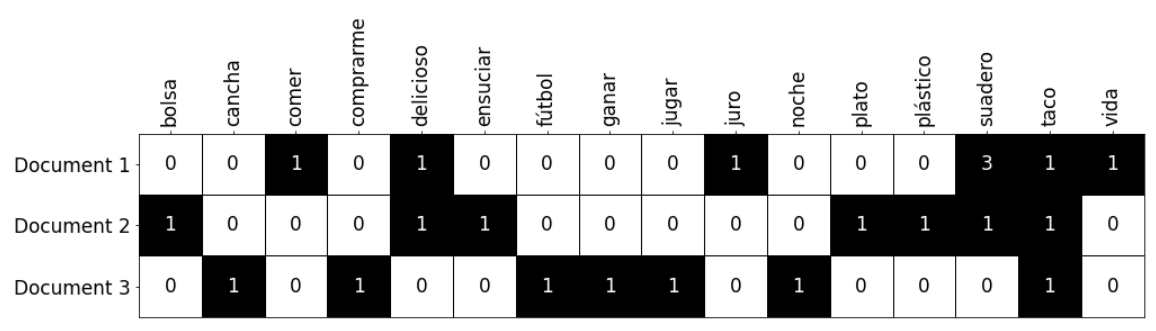

## **Framework sentence-transformers**

Otra opción de tratado de datos de texto es el 
[framework sentence-transformers](https://github.com/UKPLab/sentence-transformers). Este framework, diseñado para el trabajo de datos como imágenes y texto, provee una gran cantidad de métodos para la minería de datos como clasificación, clustering, paraphrase-mining, entre otros. Pese a que este facilita el pre-tratamiento de datos de texto, no está diseñado para trabajar con grandes volúmenes de información.

Para instalar este framework es necesario correr lo siguiente en la consola:

``!pip install sentence-transformers
``

Donde ocuparemos el método de transformación de sentencias:

``from sentence_transformers import SentenceTransformer``

# **Preguntas y problemas**

Las preguntas a responder sufrieron modificaciones a lo largo de los hitos anteriores, dado que algunas de estas preguntas eran consideradas triviales y podían ser respondidas sin utilizar técnicas de minería de datos. La propuesta inicial consistía en responder las siguientes preguntas:

1. ¿Qué tan necesario es el contexto? ¿Es necesaria la presencia del comentario padre?
2. ¿En qué subreddits el uso de sarcasmo es proporcionalmente mayor?
3. ¿Es posible entrenar un clasificador?

Todas estas preguntas fueron modificadas para el Hito 2, ya sea porque no eran suficientemente complejas o no podían ser respondidas con los conocimentos adquiridos hasta el momento. Para el segundo hito, las interrogantes planteadas fueron la siguientes:

1. ¿Qué factores influyen más en el desempeño de un clasificador? ¿Largo del comentario, palabras utilizadas, puntaje?
2. Si se entrena un clasificador en un subreddit específico, ¿Cambia el desempeño al evaluarlo en otro subreddit?
3. ¿A través de qué método se debe entrenar un clasificador para que presente un buen desempeño?

Bajo sugerencia del equipo docente se modificó la redacción de algunas de estas preguntas para abarcar conceptos más generales, y además se agregaron preguntas que permitieran la implementación de clustering para ser respondidas. De esta forma, para el Hito 3 se llegó a las siguientes interrogantes por responder:

1. ¿Es posible predecir si un mensaje es sarcástico a partir de su contenido? ¿Cuál es la mejor forma de predecir esto?
2. ¿El patrón de sarcasmo es constante entre un dominio y otro? ¿Influye el tópico en discusión al momento de detectar el sarcasmo?
3. ¿Existe alguna otra característica a través de la cual se puedan clasificar los comentarios además del sarcasmo?

# **Propuesta Experimental**

Ya habiendo explorado nuestro dataset, encontrado los métodos de tratamiento de texto, y formulado nuestras preguntas podemos generar una propuesta experimental para el estudio y análisis de comentarios sarcásticos. Las propuestas experimentales para cada pregunta son:


## **Pregunta 1 -** *¿Es posible predecir si un mensaje es sarcástico a partir de su contenido? ¿Cuál es la mejor forma de predecir esto?*

Como se desea **predecir** el valor de sarcasmo dado el contenido de un comentario, es necesario trabajar con los datos de cada comentario con el fin de crear un **clasificador**. Para esta pregunta, se asumirá que el subreddit (**dominio**) es relevante para la clasificación:

- Se trabajarán los comentarios utilizando la *vectorización de datos de texto* mencionada en su respectiva sección, con el fin de trabajar con una gran cantidad de comentarios.
- Se segmentará el dataset en los distintos subreddits del dataset (por la premisa de la pregunta).
- Se procede a separar, por cada subreddit elegido para la clasificación, en grupos de training y testing para entrenar los distintos clasificadores. Los tipos de clasificadores que se utilizarán para el entrenamiento serán: *Decision Tree*, *Support Vector Machine Classifier*, *Linear Support Vector Machine Classifier*, *K-Nearest Neighbours* y *Dummy Classifier*.
- Después de entrenar los datos, se compararán las métricas de medición de cladificadores para determinar si los clasificadores presentan un buen desempeño, y de ser así, cuál presenta el mejor desempeño.




## **Pregunta 2 -** *¿El patrón de sarcasmo es constante entre un dominio y otro? ¿Influye el tópico en discusión al momento de detectar el sarcasmo?*

Ya teniendo nuestros clasificadores entrenados, podemos proceder a cuestionar la premisa de la pregunta anterior: *¿Es realmente importante el dominio para los clasificadores de sarcasmo?*.

Si se diera el caso de que no, entonces los patrones de sarcasmo son constantes y se mantendrían sin importar el subreddit de donde provienen los comentarios sarcásticos, y los clasificadores tendrían similares resultados sin importar el subreddit de origen de los comentarios. En caso contrario, se tendría que cada tópico influye en el desempeño de los clasificadores de sarcasmo, y un clasificador entrenado en un dominio $A$ tendría un mal desempeño en un dominio $B$.

Dado lo anterior, se podrían resolver las interrogantes propuestas como sigue:

- Dado el mejor clasificador resultante de la pregunta 1, se procederá a entrenar 5 clasificadores con cada subreddit como grupo de entrenamiento.
- Para la fase de entrenamiento de los clasificadores se utilizará nuevamente el método de vectorización, por lo que se vectorizarán todos los datos de training en forma conjunta para luego separlos y proceder a entrenar los clasificadores ya mencionados.
- Posteriormente se evaluará el desempeño de cada clasificador entrenado con los datos de cada dominio, y se graficarán los resultados en una matriz de accuracy.
- Con los datos anteriores se podrá determinar si el dominio afecta al patrón de sarcasmo.

## **Pregunta 3 -** *¿Existe alguna otra característica a través de la cual se puedan clasificar los comentarios además del sarcasmo?*

A partir de los resultados de la pregunta anterior, se podría intentar visualizar de qué forma se distribuyen los comentarios a partir de sus características. Para subreddits donde la validación cruzada arroje un alto accuracy, se puede asumir que los patrones de sarcasmo serán similares, por lo que al hacer clustering para visualizar la distribución de estos se deberían tener pocos clusters. Por otra parte, para un par de subreddits con bajo accuracy al momento de realizar la validación cruzada, se deberían obtener muchos clusters disjuntos, ya que los patrones presentes en un subreddit no necesariamente coincidirán con los patrones presentes en el otro.

Dado esto, se propone resolver esta interrogante de la siguiente forma:

- Del experimento anterior, se buscarán los pares de subreddits que presenten el mejor y el peor desempeño en la validación cruzada.
- Para cada par de subreddits se uniran las listas de comentarios en una gran tabla. De esta forma se tendran dos tablas, cada una con comentarios provenientes de dos subreddits. Una de estas tendrá comentarios de dos subreddits con un patrón de sarcasmo similar, mientras que la otra tendrá los comentarios de los subreddits con el patrón de sarcasmo más distinto.
- Para cada tabla se utilizará *agglomerative clustering* con el fin de poder visualizar las similitudes entre los comentarios.
- Se utilizará el método de *ward* para graficar los clusters obtenidos. Se generará un dendograma y a partir de este se podrá visualizar el número de clusters obtenidos.
- Para una mayor facilidad en la generación de los gráficos mencionados, todo lo anterior se realizará utilizando el [framework sentence-transformers](https://github.com/UKPLab/sentence-transformers).

# **Experimento 1: Entrenamiento de clasificadores**

Para el primer experimento se decidió entrenar distintos tipos de clasificadores sobre varios segmentos de la base de datos, y de esta forma determinar a través de cuál método se obtiene un mejor desempeño. Los clasificadores utilizados para realizar la comparación fueron:

- Decision Tree
- Support Vector Machine Classifier
- Linear Support Vector Machine Classifier
- K-Nearest Neighbours
- Dummy Classifier

El primer subrredit analizado fue el que contenía la mayor cantidad de comentarios de todo tipo (*r/AskReddit*). Es importante notar que en este subreddit la proporción de comentarios sarcásticos es bastante alta en comparación con la cantidad de comentarios no sarcásticos (70% aproximadamente). Es por esto que, con el fin de verificar que la calidad del clasificador no dependiera de la cantidad de comentarios sarcásticos en el dataset, se decidió llevar a cabo el experimento también sobre un subreddit con una cantidad más balanceada de comentarios sarcásticos y no sarcásticos. El subreddit elegido para esto fue *r/worldnews*, el cuál presenta la tercera cantidad más alta de comentarios y que presenta una proporción de comentarios sarcásticos de aproximadamente un 50%.

A continuación se adjunta el código utilizado para realizar este experimento:


In [ ]:
# importaciones iniciales

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

## **Clasificadores para r/AskReddit**


In [ ]:
datosAskReddit=yes_or_no[yes_or_no['subreddit']=="AskReddit"]
datosAskReddit.head()

,comment,subreddit,score,sarcasm
0,"I don't pay attention to her, but as long as s...",AskReddit,0,yes
1,Trick or treating in general is just weird...,AskReddit,1,yes
2,what the fuck,AskReddit,22,yes
3,This would make me cry.,AskReddit,1,yes
4,My stuffed animal I've had since I was born.,AskReddit,1,yes


In [ ]:
train_comment_A,test_comment_A, train_sarcasm_A, test_sarcasm_A = train_test_split(datosAskReddit["comment"], 
                                                                    datosAskReddit["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosAskReddit["sarcasm"])

print(f"Training examples: {len(train_comment_A)}, testing examples {len(test_comment_A)}")

Training examples: 60740, testing examples 29918


In [ ]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
train_X_A = real_vectorizer.fit_transform(train_comment_A)
test_X_A = real_vectorizer.transform(test_comment_A)
train_X_A.shape

(60740, 39822)

### **Usando Decision Tree**

In [ ]:
classifier_Tree_Ask = DecisionTreeClassifier()
classifier_Tree_Ask.fit(train_X_A, train_sarcasm_A)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predicciones_Tree_Ask = classifier_Tree_Ask.predict(test_X_A)
print(classification_report(test_sarcasm_A, predicciones_Tree_Ask))

              precision    recall  f1-score   support

          no       0.59      0.45      0.51      8245
         yes       0.81      0.88      0.84     21673

    accuracy                           0.76     29918
   macro avg       0.70      0.66      0.68     29918
weighted avg       0.75      0.76      0.75     29918



### **Usando SVC**

In [ ]:
classifier_Svc_Ask = SVC(max_iter=300000)
classifier_Svc_Ask.fit(train_X_A, train_sarcasm_A)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=300000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicciones_Svc_Ask = classifier_Svc_Ask.predict(test_X_A)
print(classification_report(test_sarcasm_A, predicciones_Svc_Ask))

              precision    recall  f1-score   support

          no       0.88      0.42      0.56      8245
         yes       0.81      0.98      0.89     21673

    accuracy                           0.82     29918
   macro avg       0.85      0.70      0.73     29918
weighted avg       0.83      0.82      0.80     29918



### **Usando LinearSvc**

In [ ]:
classifier_LSvc_Ask = LinearSVC(max_iter=300000)
classifier_LSvc_Ask.fit(train_X_A, train_sarcasm_A)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=300000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
predicciones_LSvc_Ask = classifier_LSvc_Ask.predict(test_X_A)
print(classification_report(test_sarcasm_A, predicciones_LSvc_Ask))

              precision    recall  f1-score   support

          no       0.69      0.52      0.60      8245
         yes       0.83      0.91      0.87     21673

    accuracy                           0.80     29918
   macro avg       0.76      0.72      0.73     29918
weighted avg       0.79      0.80      0.79     29918



### **Usando KNN**

In [ ]:
classifier_KNN_Ask = KNeighborsClassifier(n_neighbors=10)
classifier_KNN_Ask.fit(train_X_A, train_sarcasm_A)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
predicciones_KNN_Ask = classifier_KNN_Ask.predict(test_X_A)
print(classification_report(test_sarcasm_A, predicciones_KNN_Ask))

              precision    recall  f1-score   support

          no       0.91      0.05      0.10      8245
         yes       0.74      1.00      0.85     21673

    accuracy                           0.74     29918
   macro avg       0.82      0.53      0.48     29918
weighted avg       0.78      0.74      0.64     29918



### **Usando Dummy**

In [ ]:
classifier_DummyClassifier_Ask =DummyClassifier()
classifier_DummyClassifier_Ask.fit(train_X_A, train_sarcasm_A)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [ ]:
predicciones_DummyClassifier_Ask = classifier_DummyClassifier_Ask.predict(test_X_A)
print(classification_report(test_sarcasm_A, predicciones_DummyClassifier_Ask))

              precision    recall  f1-score   support

          no       0.28      0.28      0.28      8245
         yes       0.73      0.72      0.72     21673

    accuracy                           0.60     29918
   macro avg       0.50      0.50      0.50     29918
weighted avg       0.60      0.60      0.60     29918



## **Clasificadores para r/worldnews**


In [ ]:
datosWorld=yes_or_no[yes_or_no['subreddit']=="worldnews"]
datosWorld.head()

,comment,subreddit,score,sarcasm
144140,all of which is irrelevant to whether or not A...,worldnews,1,yes
144141,"The fact we are arming ""rebels"" linked to AQ i...",worldnews,-1,yes
144142,Whilst knowing that what they were doing was i...,worldnews,1,yes
144143,"If she's already agreed to step down, isn't th...",worldnews,2,yes
144144,Were those who boycotted South Africa and only...,worldnews,1,yes


In [ ]:
train_comment_W,test_comment_W, train_sarcasm_W, test_sarcasm_W = train_test_split(datosWorld["comment"], 
                                                                    datosWorld["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosWorld["sarcasm"])

print(f"Training examples: {len(train_comment_W)}, testing examples {len(test_comment_W)}")

Training examples: 34362, testing examples 16926


In [ ]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)

train_X_W = real_vectorizer.fit_transform(train_comment_W)
test_X_W = real_vectorizer.transform(test_comment_W)

train_X_W.shape

(34362, 35032)

### **Usando Decision Tree**

In [ ]:
classifier_Tree_W = DecisionTreeClassifier()
classifier_Tree_W.fit(train_X_W, train_sarcasm_W)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predicciones_Tree_W = classifier_Tree_W.predict(test_X_W)
print(classification_report(test_sarcasm_W, predicciones_Tree_W))

              precision    recall  f1-score   support

          no       0.72      0.67      0.69      8221
         yes       0.71      0.76      0.73      8705

    accuracy                           0.71     16926
   macro avg       0.71      0.71      0.71     16926
weighted avg       0.71      0.71      0.71     16926



### **Usando SVC**

In [ ]:
classifier_Svc_W = SVC(max_iter=300000)
classifier_Svc_W.fit(train_X_W, train_sarcasm_W)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=300000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicciones_Svc_W = classifier_Svc_W.predict(test_X_W)
print(classification_report(test_sarcasm_W, predicciones_Svc_W))

              precision    recall  f1-score   support

          no       0.88      0.69      0.78      8221
         yes       0.76      0.91      0.83      8705

    accuracy                           0.81     16926
   macro avg       0.82      0.80      0.80     16926
weighted avg       0.82      0.81      0.80     16926



### **Usando LinearSvc**

In [ ]:
classifier_LSvc_W = LinearSVC(max_iter=300000)
classifier_LSvc_W.fit(train_X_W, train_sarcasm_W)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=300000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
predicciones_LSvc_W = classifier_LSvc_W.predict(test_X_W)
print(classification_report(test_sarcasm_W, predicciones_LSvc_W))

              precision    recall  f1-score   support

          no       0.81      0.74      0.78      8221
         yes       0.78      0.84      0.81      8705

    accuracy                           0.79     16926
   macro avg       0.79      0.79      0.79     16926
weighted avg       0.79      0.79      0.79     16926



### **Usando KNN**

In [ ]:
classifier_KNN_W = KNeighborsClassifier(n_neighbors=10)
classifier_KNN_W.fit(train_X_W, train_sarcasm_W)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
predicciones_KNN_W = classifier_KNN_W.predict(test_X_W)
print(classification_report(test_sarcasm_W, predicciones_KNN_W))

              precision    recall  f1-score   support

          no       0.94      0.14      0.25      8221
         yes       0.55      0.99      0.71      8705

    accuracy                           0.58     16926
   macro avg       0.74      0.57      0.48     16926
weighted avg       0.74      0.58      0.48     16926



### **Usando Dummy**

In [ ]:
classifier_DummyClassifier_W = DummyClassifier()
classifier_DummyClassifier_W.fit(train_X_W, train_sarcasm_W)

/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=None, strategy='warn')

In [ ]:
predicciones_DummyClassifier_W = classifier_DummyClassifier_W.predict(test_X_W)
print(classification_report(test_sarcasm_W, predicciones_DummyClassifier_W))

              precision    recall  f1-score   support

          no       0.48      0.48      0.48      8221
         yes       0.51      0.51      0.51      8705

    accuracy                           0.50     16926
   macro avg       0.50      0.50      0.50     16926
weighted avg       0.50      0.50      0.50     16926



## **Conclusiones Experimento 1**

A partir de los resultados obtenidos de los 5 clasificadores aplicados en ambos subreddits, se puede concluir que el mejor clasificador para este experimento es el **Support Vector Machine Classifier (SVc)**. 

Para el clasificador entrenado sobre el subreddit **r/askreddit**, se obtuvieron las siguientes métricas:

*   Precision: 0.81
*   Recall: 0.98
*   F1-score: 0.89 (mayor valor)
*   Accuracy: 0.82 (mayor valor)


Como se puede notar, este clasificador presentó el *F1-score* y el *accuracy* más alto de entre todos los otros clasificadores, mientras que el precision y el recall sólo fueron superados en desempeño por el **LinearSVC** y el **KNN**, respectivamente. Es decir, a pesar de no presentar el mayor valor en *precision* y *recall* sigue encontrándose dentro de los valores más altos. 

Para el clasificador entrenado sobre **r/worldnews** se obtuvieron las siguientes métricas:

*   Precision: 0.76
*   Recall: 0.91
*   F1-score: 0.83 (mayor valor)
*   Accuracy: 0.81 (mayor valor)


Nuevamente se tiene que el **SVC** presenta el mejor *F1-score* y *accuracy*, siendo superado en *precision* y *recall* por el **LinearSVC** y el **KNN**, de manera similar al clasificador anterior. 

Por otro lado, los clasificadores **KNN** y en especial **Dummy** obtuvieron los peores desempeños al predecir comentarios sarcásticos. En el caso del clasificador **Dummy** esto podría deberse a que su algoritmo se basa en la probabilidad y distribución de la clase que se quiere predecir, lo cuál explicaría su bajo desempeño en el subreddit **r/worldnews**, que contiene la cantidad más balanceada de comentarios sarcásticos y no sarcásticos.
 
Es importante también comentar que el clasificador **Support Vector Machine Classifier (SVc)** tuvo un tiempo de entrenamiento notablemente alto en comparación con su equivalente lineal **Linear Support Vector Machine Classifier (LinnearSVc)**, el cuál obtuvo un desempeño bastante similar. Sin embargo, el aumento de *accuracy* es muy bajo, concluyendo que esta leve diferencia no justifica el gran tiempo invertido de cómputo para su entrenamiento.

# **Experimento 2: Validación Cruzada**

A partir de los resultados obtenidos en el experimento anterior, se tiene que el tipo de clasificador que presenta el mejor desempeño con un tiempo razonable de entrenameinto es el *Linear Support Vector Machine Classifier*. Dado esto, se procede a entrenar un clasificador para cada subredit con este mismo método, para posteriormente probar cada clasificador con los datos de todos los demás subreddits.

In [ ]:
# Se obtienen datos correspondientes a cada subreddit:

datosPolitics = yes_or_no[yes_or_no['subreddit']=="politics"]
datosWorldNews = yes_or_no[yes_or_no['subreddit']=="worldnews"]
datosAskReddit = yes_or_no[yes_or_no['subreddit']=="AskReddit"]
datosLOL = yes_or_no[yes_or_no['subreddit']=="leagueoflegends"]
datosFunny = yes_or_no[yes_or_no['subreddit']=="funny"]

## **Particiones de training y testing**


In [ ]:
# Partición para r/politics:
train_comment_P,test_comment_P, train_sarcasm_P, test_sarcasm_P = train_test_split(datosPolitics["comment"], 
                                                                    datosPolitics["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosPolitics["sarcasm"])

print(f"Training examples: {len(train_comment_P)}, testing examples {len(test_comment_P)}")

Training examples: 43142, testing examples 21250


In [ ]:
# Partición para r/worldnews:
train_comment_W,test_comment_W, train_sarcasm_W, test_sarcasm_W = train_test_split(datosWorldNews["comment"], 
                                                                    datosWorldNews["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosWorldNews["sarcasm"])

print(f"Training examples: {len(train_comment_W)}, testing examples {len(test_comment_W)}")

Training examples: 34362, testing examples 16926


In [ ]:
# Partición para r/AskReddit:
train_comment_A,test_comment_A, train_sarcasm_A, test_sarcasm_A = train_test_split(datosAskReddit["comment"], 
                                                                    datosAskReddit["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosAskReddit["sarcasm"])

print(f"Training examples: {len(train_comment_A)}, testing examples {len(test_comment_A)}")

Training examples: 60740, testing examples 29918


In [ ]:
# Partición para r/leagueoflegends:
train_comment_L,test_comment_L, train_sarcasm_L, test_sarcasm_L = train_test_split(datosLOL["comment"], 
                                                                    datosLOL["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosLOL["sarcasm"])

print(f"Training examples: {len(train_comment_L)}, testing examples {len(test_comment_L)}")

Training examples: 30805, testing examples 15174


In [ ]:
# Partición para r/funny:
train_comment_F,test_comment_F, train_sarcasm_F, test_sarcasm_F = train_test_split(datosFunny["comment"], 
                                                                    datosFunny["sarcasm"],
                                                                    test_size=.33, random_state=37,
                                                                    stratify=datosFunny["sarcasm"])

print(f"Training examples: {len(train_comment_F)}, testing examples {len(test_comment_F)}")

Training examples: 28743, testing examples 14158


## **Tamaños de las particiones de cada subreddit**

In [ ]:
# Tamaño de r/politics:
tamaño_P = train_comment_P.shape[0]
tamaño_P2 = test_comment_P.shape[0]

tamaño_P

43142

In [ ]:
# Tamaño de r/worldnews:
tamaño_W = train_comment_W.shape[0]
tamaño_W2 = test_comment_W.shape[0]

tamaño_W

34362

In [ ]:
# Tamaño de r/AskReddit
tamaño_A = train_comment_A.shape[0]
tamaño_A2 = test_comment_A.shape[0]

tamaño_A

60740

In [ ]:
# Tamaño de r/leagueoflegends:
tamaño_L = train_comment_L.shape[0]
tamaño_L2 = test_comment_L.shape[0]

tamaño_L

30805

In [ ]:
# Tamaño de r/funny:
tamaño_F = train_comment_F.shape[0]
tamaño_F2 = test_comment_F.shape[0]

tamaño_F

28743

## **Fusión de los grupos de training y vectorización**

Recordemos que el método de Vectorización crea una matriz de valores dependiendo de los tokens únicos de los elementos del dataset. Eso lleva a que vectorizaciones de grupos distintos de un mismo dataset no necesariamente sean compatibles, ya que pueden existir palabras en un grupo del dataset que no existen en el otro y viceversa, haciendo inútil una vectorización y un entrenamiento sobre distintos grupos de vectorización.

Por lo explicado anteriormente, es necesario concatenar todas las particiones de training y generar una única matriz de vectorización, para evitar errores de ínice y de tokens inexistentes entre grupos de entrenamiento.

In [ ]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
training_partition = pd.concat([train_comment_P,train_comment_W,train_comment_A,train_comment_L,train_comment_F])
trains_x_PWALF=real_vectorizer.fit_transform(training_partition)

testing_partition = pd.concat([test_comment_P,test_comment_W,test_comment_A,test_comment_L,test_comment_F])
tests_x_PWALF = real_vectorizer.transform(testing_partition)

## **Segmentación de los grupos de training y testing**

Ya habiendo vectorizado todos los datos de training y testing, podemos proceder a separarlos por subreddit para su posterior entrenamiento y evaluación. Es importante precisar que el órden de los datos antes y después de la vectorización se conserva, por lo que esta segmentación resulta trivial.

In [ ]:
train_X_P = trains_x_PWALF[0:tamaño_P,:]
train_X_W = trains_x_PWALF[tamaño_P:tamaño_P + tamaño_W,:]
train_X_A = trains_x_PWALF[tamaño_P + tamaño_W:tamaño_P + tamaño_W+ tamaño_A,:]
train_X_L = trains_x_PWALF[tamaño_P + tamaño_W + tamaño_A:tamaño_P + tamaño_W+ tamaño_A + tamaño_L,:]
train_X_F = trains_x_PWALF[tamaño_P + tamaño_W + tamaño_A + tamaño_L:tamaño_P + tamaño_W + tamaño_A + tamaño_L + tamaño_F,:]
print(train_X_P.shape)
print(train_X_W.shape)
print(train_X_A.shape)
print(train_X_L.shape)
print(train_X_F.shape)

(43142, 84326)
(34362, 84326)
(60740, 84326)
(30805, 84326)
(28743, 84326)


In [ ]:
test_X_P = tests_x_PWALF[0:tamaño_P2,:]
test_X_W = tests_x_PWALF[tamaño_P2:tamaño_P2 + tamaño_W2,:]
test_X_A = tests_x_PWALF[tamaño_P2 + tamaño_W2:tamaño_P2 + tamaño_W2 + tamaño_A2,:]
test_X_L = tests_x_PWALF[tamaño_P2 + tamaño_W2 + tamaño_A2:tamaño_P2 + tamaño_W2 + tamaño_A2 + tamaño_L2,:]
test_X_F = tests_x_PWALF[tamaño_P2 + tamaño_W2 + tamaño_A2 + tamaño_L2:tamaño_P2 + tamaño_W2 + tamaño_A2 + tamaño_L2 + tamaño_F2,:]
print(test_X_P.shape)
print(test_X_W.shape)
print(test_X_A.shape)
print(test_X_L.shape)
print(test_X_F.shape)

(21250, 84326)
(16926, 84326)
(29918, 84326)
(15174, 84326)
(14158, 84326)


## **Entrenamiento de clasificadores**

Ya separados correctamente los datos de training, basta proceder a entrenar nuestros clasificadores utilizando el *Linear Support Vector Machine Classifier*.

In [ ]:
# Accuracy de cada clasificador entrenado con los datos del subreddit correspondiente:

train_X = [train_X_P,train_X_W, train_X_A,train_X_L, train_X_F]
train_sarcasm = [train_sarcasm_P, train_sarcasm_W, train_sarcasm_A,train_sarcasm_L, train_sarcasm_F]
test_X = [test_X_P,test_X_W, test_X_A,test_X_L, test_X_F]
test_sarcasm = [test_sarcasm_P,test_sarcasm_W, test_sarcasm_A,test_sarcasm_L, test_sarcasm_F]
names = ["r/politics","r/worldnews","r/AskReddit","r/leagueoflegends","r/funny"]

classifier_LinearSVC = []

for i in range(5):
  classifier_LSVC = LinearSVC(max_iter=300000)
  classifier_LSVC.fit(train_X[i], train_sarcasm[i])
  classifier_LinearSVC.append(classifier_LSVC)
  predicciones_LSVC = classifier_LSVC.predict(test_X[i])
  accuracy_LSVC = accuracy_score(test_sarcasm[i], predicciones_LSVC)
  print(f"Accuracy de {names[i]}: {accuracy_LSVC:.4%}")

Accuracy de politics: 81.8871%
Accuracy de worldnews: 79.2804%
Accuracy de askreddit: 80.3764%
Accuracy de leagueoflegends: 76.5915%
Accuracy de funny: 68.6326%


## **Testing por cada subreddit**

Ya obtenidos nuestros 5 clasificadores, basta testearlos con los datos de todos los subreddits y observar los resultados.

In [ ]:
# Accuracy de cada clasificador evaluado con datos de testing de cada subreddit:

accuracy_matrix = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]

for i in range(5):
  for j in range(5):
    predicciones_LSVC = classifier_LinearSVC[i].predict(test_X[j])
    accuracy_LSVC = accuracy_score(test_sarcasm[j], predicciones_LSVC)
    accuracy_matrix[i][j]=accuracy_LSVC
    print(f"Accuracy de {names[i]} con datos de {names[j]}: {accuracy_LSVC:.4%}")

Accuracy de politics con datos de politics: 81.8871%
Accuracy de politics con datos de worldnews: 73.8272%
Accuracy de politics con datos de askreddit: 76.2685%
Accuracy de politics con datos de leagueoflegends: 62.3039%
Accuracy de politics con datos de funny: 58.3345%
Accuracy de worldnews con datos de politics: 75.8588%
Accuracy de worldnews con datos de worldnews: 79.2804%
Accuracy de worldnews con datos de askreddit: 73.4575%
Accuracy de worldnews con datos de leagueoflegends: 64.3469%
Accuracy de worldnews con datos de funny: 59.9520%
Accuracy de askreddit con datos de politics: 74.0941%
Accuracy de askreddit con datos de worldnews: 69.4139%
Accuracy de askreddit con datos de askreddit: 80.3764%
Accuracy de askreddit con datos de leagueoflegends: 62.1326%
Accuracy de askreddit con datos de funny: 58.1156%
Accuracy de leagueoflegends con datos de politics: 70.3059%
Accuracy de leagueoflegends con datos de worldnews: 69.8925%
Accuracy de leagueoflegends con datos de askreddit: 71.7

In [ ]:
# Matriz de valores de accuracy
accuracy_matrix

[[0.8188705882352941,
  0.7382724802079641,
  0.7626846714352564,
  0.6230394095162779,
  0.5833451052408533],
 [0.7585882352941177,
  0.792803970223325,
  0.7345745036432917,
  0.6434690918676684,
  0.5995197061731883],
 [0.7409411764705882,
  0.6941391941391941,
  0.8037636205628719,
  0.6213259522868064,
  0.5811555304421528],
 [0.7030588235294117,
  0.6989247311827957,
  0.7176281837021191,
  0.7659153815737446,
  0.6113151575081226],
 [0.6784,
  0.6709204773720903,
  0.6646834681462664,
  0.6468301041254778,
  0.6863257522248906]]

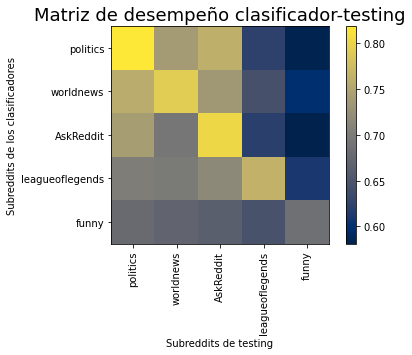

In [ ]:
# Grafico de matriz de accuracies:

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

labels = ['r/politics','r/worldnews','r/AskReddit','r/leagueoflegends','r/funny']
title = 'Matriz de desempeño clasificador-testing'

fig, ax = plt.subplots(1,1)
plt.imshow(accuracy_matrix, cmap="cividis")
plt.colorbar()
plt.title(title, fontsize=18)
plt.xlabel('Subreddits de testing')
plt.ylabel('Subreddits de los clasificadores')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3,4])
ax.set_xticklabels(labels)
plt.xticks(rotation=90)
ax.set_yticklabels(labels)
plt.show()

## **Conclusiones Experimento 2**

Como se puede evidenciar en el gráfico obtenido en la sección anterior, la diagonal puede distinguirse y presenta un color mucho más claro que las celdas adyacentes. Esto muestra que los clasificadores entrenados con los datos de un subreddit en específico siempre tienen un mejor desempeño al ser evaluados con datos provenientes de este mismo subreddit.

A pesar de esto, se puede evidenciar una atenuación del color a medida que se va bajando en la diagonal. Esto no se debe al azar, ya que en el gráfico los subreddits fueron ordenados bajo un criterio específico: la seriedad del tema abordado. Al principio del gráfico se consideraron subreddits en los cuales se discuten temas serios, como **r/politics** y **r/worldnews**, mientras que al final se ubican los subreddits con temas más relacionados al ocio, como **r/funny** y **r/leagueoflegends**. **r/AskReddit** se ubicó al centro ya que las discusiones presentes en este subreddit abarcan desde conversaciones serias hasta temas más distendidos, por lo que se consideró el mejor candidato para ocupar el punto medio.

De esta forma, se puede ver que los clasificadores presentan mejor desempeño en los subreddits serios, mientras que el accuracy disminuye a medida que disminuye la seriedad del tema abordado. Esto puede deberse a varios factores, uno de estos es que en los subreddits serios, un comentario sarcástico o en tono de broma debe ser remarcado como tal para evitar confusiones al momento de discutir un tema, mientras que en un subreddit menos serio donde el diálogo entre los usuarios tiende a ser en tono de broma, no es necesario estar constantemente demarcando el uso de sarcasmo con una "/s", por lo que pueden tenerse comentarios sarcásticos o humorísticos sin una etiqueta que los identifiquen como tales, introduciendo ruido en los datos y empeorando el desempeño del clasificador.

Con respecto a los datos obtenidos a partir de la validación cruzada, el mejor desempeño al momento de probar clasificadores con datos externos al subreddit de entrenamiento se obtuvo al evaluar comentarios extraidos de **r/AskReddit** en el clasificador entrenado con comentarios de **r/politics**, con un accuracy de un 76.26%.

Por el contrario, el peor desempeño al validar de forma cruzada se encontró al evaluar comentarios obtenidos desde **r/funny** en el clasificador entrenado con datos de **r/AskReddit**. En este caso, el accuracy obtenido fue de un 58.11%, el valor más bajo obtenido en este experimento.

Claramente se puede distinguir un cuadrado presente en la esquina superior izquierda del gráfico, correspondiente a la validación cruzada llevada a cabo con los tres subreddits más serios: **r/politics**, **r/worldnews** y **r/askreddit**. Este alto desempeño puede explicarse ya que en estos tres subreddits se abarcan temas similares, por lo que el patrón de sarcasmo no debería presentar mayores variaciones entre ellos. 

Finalmente, se puede notar que la matriz no presenta simetría, ya que las validaciones cruzadas de la parte superior derecha presentan peor desempeño que las de la parte inferior izquierda. Esto puede interpretarse como que como que los clasificadores entrenados con comentarios de subreddits serios no detectan bien los comentarios sarcásticos de subreddits más informales. Sin embargo, no se tiene el caso inverso, ya que los clasificadores entrenados con comentarios de subreddits menos serios logran detectar de cierta forma el patrón de sarcasmo de los subreddits serios. Esto puede deberse a que en los subreddits poco serios existe una mayor variedad de temas abordados, por lo que el patrón de sarcasmo es menos propenso a overfitting y logra abarcar una mayor cantidad de tipos de comentarios sarcásticos.


# **Experimento 3: Clustering**

A raíz de la parte anterior se puede evidenciar que los datos de **r/AskReddit** y **r/politics** presentan bastante sinergia entre si, concluyéndose que el patrón de sarcasmo es similar en ambos subreddits. Por otra parte, el patrón de sarcasmo presenta mayores diferencias entre los subreddits **r/funny** y **r/AskReddit**. Teniendo estos datos, se busca corroborar qué tanto difiere el patrón de sarcasmo para explicar esta discrepancia en los resultados obtenidos.

Para responder a esta interrogante se empleará el clustering, con el fin de poder visualizar de qué forma se agrupan los comentarios de los subreddits obtenidos. Para los dos primeros, se espera obtener pocos clusters que reflejen la similitud en los patrones de sarcasmo en ambos subreddits, mientras que para el segundo par, se espera encontrar una mayor dispersión entre los datos, y por consiguiente un mayor número de clusters.

In [ ]:
# Install the library using pip
!pip install sentence-transformers

In [ ]:
from sklearn.model_selection import train_test_split

## **Dendograma para r/AskReddit + r/politics**

Primero se hará clustering con los comentarios obtenidos desde r/AskReddit y r/politics. Como en el experimento 2 se comprobó que el patrón de sarcasmo es bastante similar entre estos dos subreddits, se espera que al hacer clustering con los comentarios se obtenga un bajo número de clusters.

Debido a que el número de comentarios es muy elevado y el proceso de clustering es computacionalmente caro, se decidió utilizar solamente una muestra del 10% de los datos de cada subreddit. Para esto se dividieron los datasets de forma similar al proceso de división en grupos de training y testing, para de esta forma conservar la proporción de comentarios sarcásticos y no sarcásticos. 

In [ ]:
politicsComments=yes_or_no[yes_or_no['subreddit']=="politics"]
askRedditComments=yes_or_no[yes_or_no['subreddit']=="AskReddit"]

In [ ]:
train_comment_P,test_comment_P, train_sarcasm_P, test_sarcasm_P = train_test_split(politicsComments["comment"], 
                                                                    politicsComments["sarcasm"],
                                                                    test_size=.90, random_state=37,
                                                                    stratify=politicsComments["sarcasm"])

print(f"Training examples: {len(train_comment_P)}, testing examples {len(test_comment_P)}")

Training examples: 6439, testing examples 57953


In [ ]:
train_comment_A,test_comment_A, train_sarcasm_A, test_sarcasm_A = train_test_split(askRedditComments["comment"], 
                                                                    askRedditComments["sarcasm"],
                                                                    test_size=.90, random_state=37,
                                                                    stratify=askRedditComments["sarcasm"])

print(f"Training examples: {len(train_comment_A)}, testing examples {len(test_comment_A)}")

Training examples: 9065, testing examples 81593


In [ ]:
comments = np.concatenate((train_comment_P,train_comment_A),axis=None)
print(comments.size)
print(comments)

15504
['Which law is it that requires you to release your tax returns again?'
 "That's thing thing to say if you're from Hawaii... what's the Kenyan way?"
 'SCOTUS would have him deported.' ...
 "fuck all your ex's friends, then have a threesome with their parents"
 "So wouldn't folding allow carbon to penetrate the surface?"
 "It still is and I'm surprised it still regularly gets posts on the 1st 3 pages of all despite being a super dead meme format."]


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Corpus with example sentences
corpus = comments
corpus_embeddings =  model.encode(corpus, batch_size=64, show_progress_bar=True, convert_to_tensor=True)
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

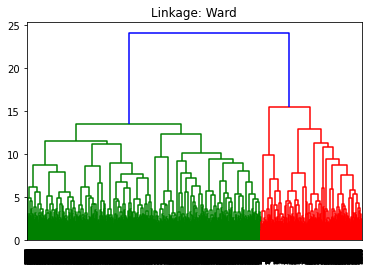

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
ward = linkage(corpus_embeddings, method="ward")
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

Como se puede evidenciar en el gráfico, el número de clusters obtenidos en las primeras ramificaciones del dendograma es bajo. Además, se puede observar que si se realiza un corte a la altura de 15 se obtienen 2 clusters.

## **Dendograma para r/AskReddit + r/funny**

Como estos dos subreddits presentaron bajo accuracy al momento de hacer la validación cruzada, se espera que el número de clusters obtenidos sea elevado, ya que se espera que exista mayor diversidad con los patrones de sarcasmo.



In [ ]:
funnyComments=yes_or_no[yes_or_no['subreddit']=="funny"]
askRedditComments=yes_or_no[yes_or_no['subreddit']=="AskReddit"]

In [ ]:
train_comment_F,test_comment_F, train_sarcasm_F, test_sarcasm_F = train_test_split(funnyComments["comment"], 
                                                                    funnyComments["sarcasm"],
                                                                    test_size=.90, random_state=37,
                                                                    stratify=funnyComments["sarcasm"])

print(f"Training examples: {len(train_comment_F)}, testing examples {len(test_comment_F)}")

Training examples: 4290, testing examples 38611


In [ ]:
train_comment_A,test_comment_A, train_sarcasm_A, test_sarcasm_A = train_test_split(askRedditComments["comment"], 
                                                                    askRedditComments["sarcasm"],
                                                                    test_size=.90, random_state=37,
                                                                    stratify=askRedditComments["sarcasm"])

print(f"Training examples: {len(train_comment_A)}, testing examples {len(test_comment_A)}")

Training examples: 9065, testing examples 81593


In [ ]:
comments = np.concatenate((train_comment_F,train_comment_A),axis=None)
print(comments.size)
print(comments)

13355
["He's already a lovely tenor."
 'Mine is actually a very dark red, reminiscent of purple'
 'Just like there is a huge underground market for alcohol' ...
 "fuck all your ex's friends, then have a threesome with their parents"
 "So wouldn't folding allow carbon to penetrate the surface?"
 "It still is and I'm surprised it still regularly gets posts on the 1st 3 pages of all despite being a super dead meme format."]


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embedder = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Corpus with example sentences
corpus = comments
corpus_embeddings =  model.encode(corpus, batch_size=64, show_progress_bar=True, convert_to_tensor=True)
# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

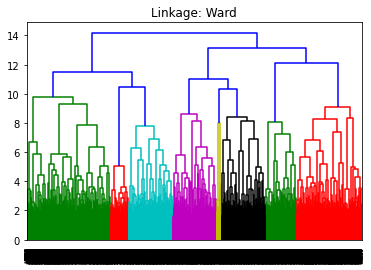

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
ward = linkage(corpus_embeddings, method="ward")
dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

Como se puede ver en el gráfico, existen bastantes clusters distintos. La forma del gráfico contrasta bastante con la obtenida en el gráfico anterior, evidenciando la mayor variedad de patrones en los comentarios analizados.

## **Conclusiones Experimento 3**

Tal como se había previsto en la propuesta experimental y de las conclusiones del experimento 2, los gráficos muestran una notable dispersión de clusters entre subreddits con menos sinergia, mientras que la unión de distintos subreddits con mayor sinergia apreciada en el desempeño cruzado de clasificadores genera menos clusters.

Observando el primer dendograma con los subreddits **r/AskReddit** y **r/politics** podemos ver claramente dos patrones marcados y con practicamente nada de ruido. Esto reafirma la idea de que dos subreddits relativamente *serios* preservan los mismos patrones de sarcasmo, lo cuál explicaría que sus clasificadores tengan desempeños tan altos incluso cuando sus datos son cruzados. 

Por otro lado, al observar el segundo dendograma con los subreddits **r/AskReddit** y **r/funny** se aprecia una gran cantidad de clusters, lo cuál podría indicar que **r/funny** tiene patrones disjuntos a los del subreddit **r/AskReddit**, o que **r/funny** aprecia un gran abanico de patrones de sarcasmo (por la diversidad de comentarios humorísticos presentes en este) en comparacipon a los de **r/AskReddit**. En cualquier caso, esto explicaría el porque el clasificador entrenado en los datos del subreddit **r/AskReddit** tiene un desempeño tan bajo en los datos de testing de **r/funny**.



# **Conclusiones finales**

Una de las principales conclusiones que se pueden extraer de este proyecto es que efectivamente es posible entrenar clasificadores que detecten el sarcasmo si se posee una base de datos previamente etiquetada, donde el mejor método encontrado es el clasificador **Support Vector Machine**. Lo anterior nos puede dar una idea de la distribución que podrían tomar los comentarios sarcásticos respecto a los no sarcásticos, dado que la técnica utilizada por **SVC** consta en encontrar un hiperplano que divida el dataset.

Por otro lado, también se puede concluir que los patrones de sarcasmo no son globales y dependen mucho del contexto en el que son empleados. En concreto, a partir de los resultados se extrae que el sarcasmo es mucho mas fácil de detectar en contextos de discusión seria, como subreddits donde se hablan temas de actualidad y politica, lo cuál podría indicar que los patrones de sarcasmo contrastan bastante en los diálogos formales en comparación a los que no.

Finalmente, a lo largo de este proyecto pudimos darnos cuenta de la dificultad y complejidad computacional que requiere la minería de datos de texto. Pese a que logramos encontrar formas de poder trabajar en text-mining, nos topamos con dificultades técnicas en memoria y tiempo de ejecución, o con dificultades de visualización de los datos obtenidos debido a la gran dimensionalidad de los datos. 

# **Planificación futura**

Uno de los objetivos propuestos inicialmente y que por dificultades de tiempo no se pudo implementar fue el entrenamiento de los clasificadores bajo otros parámetros de los comentarios que no involucren la vectorización del texto. Específicamente, existen bastantes componentes en los comentarios que en este caso fueron ignoradas, como el uso de mayúsulcas o de puntuación, las cuales pueden influir en si este puede ser percibido como un comentario sarcástico o no. 

Otra de las propuestas de mejora a este proyecto es encontrar mejores maneras de entrenar un clasificador basado en texto, mediante la implementación de librerías que permitan un trabajo más eficiente y que permitan un mejor entendimiento del proceso que se está llevando a cabo.

Por otro lado, una idea que se propuso al inicio del semestre y no fue llevada a cabo debido a la falta de conocimientos fue el uso de los comentarios padre presentes en el dataset. Originalmente se deseaba determinar si saber el comentario al que se hacía respuesta (el comentario padre) podía ser utilizado para mejorar el desempeño del clasificador, pero dado que no se tenían las herramientas para determinar esto se decidió descartar la idea, por lo que finalmente la presencia de los comentarios padre en el dataset inicial no pudo ser aprovechada.

# **Aportes individuales**

- Nicolás García: Elaboración de informe, Conclusiones de los experimentos 1, 2 y 3, Conclusiones finales.
- Javier Lavados: Realización de experimentos 1, 2 y 3.
- José Triviño: Elaboración de informe, Elaboración de presentación, Conclusiones de los experimentos 1, 2 y 3, Conclusiones finales.
- Pablo Gutiérrez: Elaboración de informe, Visualización y Conclusiones de experimento 2.
- Sebastián Salinas: Realización de experimentos 2 y 3, implementación de librerías externas.